### ATSC 405
### Carnot problem for Wednesday 30th March 2016

#### H Thompson

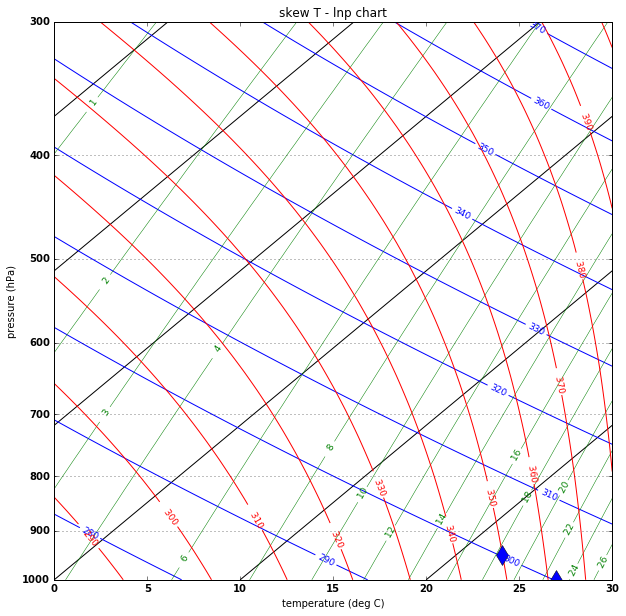

In [15]:
from a405skewT.makeSkewII import makeSkewWet
from a405thermo.thermlib import find_rsat 
from a405thermo.thermlib import find_lcl
from a405thermo.thermlib import tinvert_rsat
from a405thermo.thermlib import convertTempToSkew
%matplotlib inline

temp_1 = 300   # K
press_1 = 1000   # hPa
RH = 0.8

rsat_1 = find_rsat(temp_1, press_1*1e2)
mixing_r_1 = rsat_1 * RH
dew_temp_1 = tinvert_rsat(1,mixing_r_1,press_1)
temp_2, lcl_1 = find_lcl(dew_temp_1, temp_1, press_1*1e2)
lcl_1 = lcl_1 * 0.01
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax, skew = makeSkewWet(ax, corners=[0,30])
ax.set(ylim=[1000, 300])

xplot = convertTempToSkew(temp_1-273., press_1, skew)
dot = ax.plot(xplot,press_1, 'bd', markersize=14, markerfacecolor='b')

xplot = convertTempToSkew(temp_2-273, lcl_1, skew)
dot = ax.plot(xplot, lcl_1, 'bd', markersize=14, markerfacecolor='b')
